---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

<IPython.core.display.Javascript object>


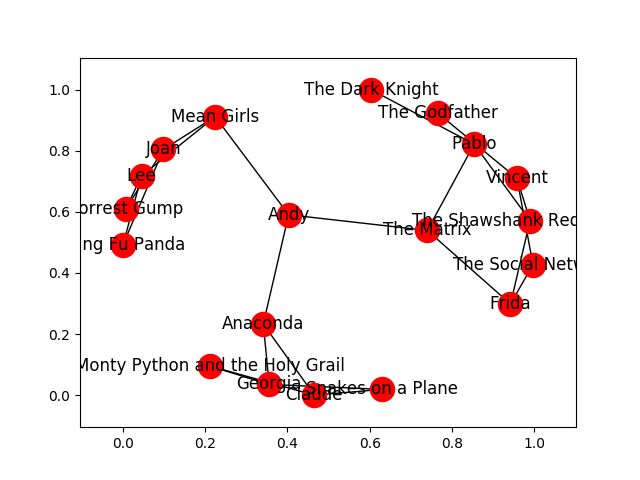

In [90]:
def answer_one():
        
    # Your Code Here
#     chess=nx.Graph()
#     chess.add_nodes_from(employees,bipartite=0)
#     chess.add_nodes_from(movies,bipartite=1)
#     chess = nx.read_edgelist('Employee_Movie_Choices.txt')
    df = pd.read_csv('Employee_Movie_Choices.txt', delimiter='\t')
    B = nx.from_pandas_dataframe(df, '#Employee', 'Movie')
    return B# Your Answer Here
# B=answer_one()
# # bipartite.is_bipartite_node_set(chess,movies)
# # bipartite.is_bipartite_node_set(chess,employees)
# # len(chess.edges())
# # len(chess.nodes())
# plot_graph(B)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

<IPython.core.display.Javascript object>


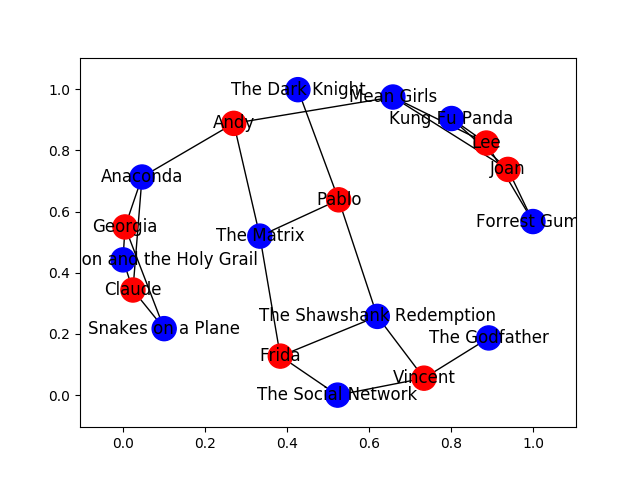

In [91]:
def answer_two():
    
    # Your Code Here
    B=answer_one()
    B.add_nodes_from(employees, type='employee')
    B.add_nodes_from(movies, type='movie')
    return B# Your Answer Here Answer ends here
# chess=answer_two()
# chess.nodes(data=True)
# labels = nx.get_node_attributes(chess, 'type') 

# node_cmap=[]
# for x in labels:
#     if labels[x]=='movie':
#         node_cmap.append('blue')
#     else:
#         node_cmap.append('red')

# nx.draw_networkx(chess,with_labels=True,node_color=node_cmap)

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


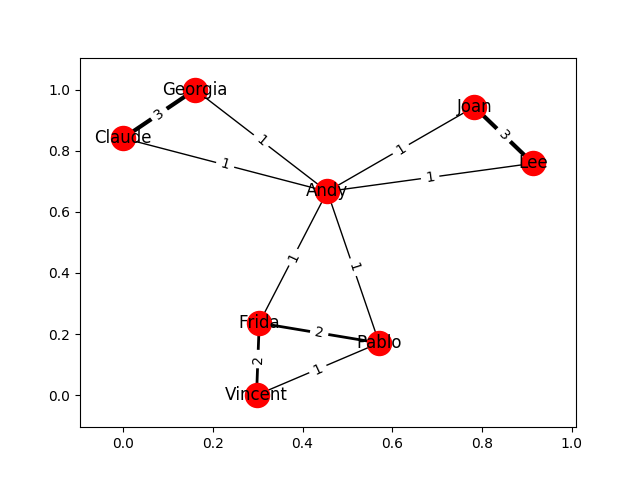

In [62]:
def answer_three():
        
    # Your Code Here
    B=answer_two()
    P=bipartite.weighted_projected_graph(B,employees)
    return P # Your Answer Here
# P=answer_three()
# P.edges(data=True)
# plot_graph(P,'weight')

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [86]:
# def minifun(x):
#     try:
#         a=P[x[0]][x[1]]['weight']
#     except:
#         a=0
#     return a
def answer_four():
    # Your Code Here
    def minifun(x):
        try:
            a=P[x[0]][x[1]]['weight']
        except:
            a=0
        return a
    df = pd.read_csv('Employee_Relationships.txt', header=None,delimiter='\t',names=['E1','E2','Relation'])
    P=answer_three()
    df['common']=df.apply(minifun,axis=1)
    a=df['Relation']
    b=df['common']
    return a.corr(b,method='pearson')# Your Answer Here
answer_four()

0.78839622217334748